# Microsoft Movie Analysis

##### Author: Fridah Kimathi

### **Overview**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. Exploratory Data Analysis was used in this project to provide insights on which movie genres are performing well on box office. Recommendations were then made 
to help guide Microsoft's new movie studio decide which movies they should produce.

#### **Importing all the required Python Libraries**

In [1]:
#For data wrangling and manipulation
import pandas as pd

# numpy for numerical operation and arrays
import numpy as np 

# seaborn and matplotlib for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### **Loading the data**
> <ul type='square'> <li>Created a function to load data into the notebook . </li> <ul>

In [2]:
def load_data(path):

    """A function to load data"""
    
    df = pd.read_csv(path, compression='gzip')
    return df

In [3]:
movie_gross = load_data('zippedData/bom.movie_gross.csv.gz')

In [4]:
ratings = load_data('zippedData/imdb.title.ratings.csv.gz')

In [5]:
title_basics = load_data('zippedData/imdb.title.basics.csv.gz')

## **Data Understanding**

#### **1. Understanding *movie_gross* dataframe**

In [6]:
# Previewing the first 5 rows
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# Getting a concise summary of the dataframe
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### **2. Understanding *title_basics* dataframe**

In [8]:
title_basics[title_basics[['primary_title', 'start_year', 'genres']].duplicated()].sort_values('primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama
105408,tt6160528,88,88,2016,103.0,Documentary
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
...,...,...,...,...,...,...
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66994,tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66995,tt3815134,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


In [9]:
# Previewing the first 5 rows
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
# Getting a concise summary of the datafram
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


##### **3. Understanding the *ratings* dataframe** 

In [11]:
#Previewing the first 5 rows
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
# Getting a concise summary of the datafram
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
# Statistical of the dataframe 
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


## **Data Cleaning**

> ### **1. Cleaning *movie_gross* dataframe**

* #### **Identifying duplicates**
    <ul type='square'><li>Checking for duplicates using the title and year column,since we don't want movies with the same title and were produced in the same year  </li> <ul>

In [14]:
movie_gross[['title', 'year']].duplicated(keep=False).sum()
    #The dataset has no duplicates.

0

* #### **Identifying missing values**
    <ul type='square'><li>Created a function to print out columns with missing data in a dataframe. </li> <ul>


In [15]:
def column_missing_values(data):
    
    """A function to check for missing values"""

    missing_data = {column:data[column].isnull().sum() for column in data.columns  if data[column].isnull().sum()}
    return(missing_data)

In [16]:
# Checking for missing values by calling the column_missing_values function

column_missing_values(movie_gross)

{'studio': 5, 'domestic_gross': 28, 'foreign_gross': 1350}

In [17]:
#Replacing the missing values in column 'studio' with 'Unknown'

movie_gross['studio'].fillna('Unknown', inplace=True)

In [18]:
#Confirming the missing values in column 'studio' have been dropped

column_missing_values(movie_gross)

{'domestic_gross': 28, 'foreign_gross': 1350}

In [19]:
#Replacing the missing values in column 'domestic_gross' with zero

movie_gross['domestic_gross'].fillna(0, inplace=True)

In [20]:
#Confirming the missing values in column 'domestic_gross' have been dropped

column_missing_values(movie_gross)

{'foreign_gross': 1350}

In [21]:
# The percentage of missing values in column foreign_gross is 39%.

movie_gross["foreign_gross"].isnull().value_counts(normalize=True)

False    0.601417
True     0.398583
Name: foreign_gross, dtype: float64

In [22]:
#Replacing the missing values in column 'foreign_gross' with zero

movie_gross['foreign_gross'].fillna(0, inplace=True)

In [23]:
#Confirming the missing values in column 'foreign_gross' have been dropped

column_missing_values(movie_gross)

{}

* #### **Checking the data types**

In [24]:
movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

>   <ul type='square'><li> foreign_gross, year have incorrect datatypes </li> <ul>



In [25]:
#Converting the datatype of the 'foreign_gross' column from object to float64

movie_gross['foreign_gross'] = [float(str(i).replace(",", "")) for i in movie_gross['foreign_gross']]

In [26]:
# Converting the datatype of the 'year column' from int64 to int32
# This will allow the correct output to be displayed when the datatype is converted to datetime64[ns]

movie_gross['year'].astype('int32')

#Converting the datatype from int32 to datetime64[ns]

movie_gross['year'] = pd.to_datetime(movie_gross['year'], format = '%Y')

In [27]:
#Confirming all the data types are now correct

movie_gross.dtypes

title                     object
studio                    object
domestic_gross           float64
foreign_gross            float64
year              datetime64[ns]
dtype: object

* #### **Checking for placeholders and Outliers**
    > <ul type='square'> <li>Created a function to check for placeholders. </li> <ul>

In [28]:
def check_placeholders(data):
    
    """ A function for checking for placeholders in the dataframe"""

    for column in data.columns:
        print(data[column].value_counts())
        print('***************************************************\n')

In [29]:
# Checking the placeholders and outliers by calling the check_placeholders() function

check_placeholders(movie_gross)

    # The data has no placeholders or outliers 

Bluebeard                    2
I'll See You In My Dreams    1
Earth to Echo                1
The Green Inferno            1
Blockers                     1
                            ..
Himmatwala                   1
Oculus                       1
First Man                    1
Wonderstruck                 1
Hit and Run                  1
Name: title, Length: 3386, dtype: int64
***************************************************

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
        ... 
Argo.      1
Arth.      1
AaF        1
WOW        1
B360       1
Name: studio, Length: 258, dtype: int64
***************************************************

1100000.0      32
1000000.0      30
1300000.0      30
0.0            28
1200000.0      25
               ..
71900.0         1
87000000.0      1
739000.0        1
336000000.0     1
221000.0        1
Name: domestic_gross, Length: 1798, dtype: int64
***************************************************

0.0            1350
1200000.0 

* #### **Creating a new column called 'total_gross' that is a sum of 'domestic_gross' and 'foreign_gross'**

In [30]:
movie_gross = movie_gross.eval("total_gross = domestic_gross + foreign_gross")
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010-01-01,1.025500e+09


> ### 2. **Cleaning *title_basics* DataFrame**

 * #### **Identifying duplicates**

In [31]:
#Checking for duplicates using the 'primary_title' and 'start_year' columns
title_basics[title_basics[['primary_title', 'start_year']].duplicated(keep=False)].sort_values('primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
106201,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary"
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary"
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
24194,tt1979163,180,180,2011,107.0,"Comedy,Drama"
...,...,...,...,...,...,...
66995,tt3815134,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
92592,tt5352034,Çagrilan,Çagrilan,2016,85.0,Horror


 - Dropping the above duplicates while keeping the entry with the least number of null values was achieved by:
  
    <ol type='i'> <li> Creating a new column called 'Number_missing' that has the count of the number of missing values per row.</li> 
    <li>Arranged that new column by ascending order so that rows with high number of missing values are the last. </li>
    <li>Dropped duplicates using the 'primary_title' and 'start_year' column and kept the first entry which has the least number of null values. </li>
    <li> Dropped the column 'Number_missing' since it is no longer required in the dataframe</li>

</ol>

In [32]:
title_basics = title_basics.assign(Number_missing=title_basics.isnull().sum(1))\
                    .sort_values(by='Number_missing', ascending=True)\
                    .drop_duplicates(subset=['primary_title', 'start_year'], keep='first')\
                    .drop('Number_missing', axis=1)

In [33]:
#Confirming the duplicates have been dropped

title_basics[['primary_title', 'start_year']].duplicated().sum()

0

* #### **Identifying missing values**

In [34]:
# Checking the missing values by calling the column_missing_values() function

column_missing_values(title_basics)

{'original_title': 16, 'runtime_minutes': 30979, 'genres': 5147}

In [35]:
# Replacing missing values in the 'original_title' column with corresponding values in the 'primary_title' column

title_basics['original_title'].fillna(title_basics['primary_title'], inplace=True)

In [36]:
# Confirming the missing values in the 'original_title' have been replaced

column_missing_values(title_basics)

{'runtime_minutes': 30979, 'genres': 5147}

In [37]:
# Replacing the missing values in the 'runtime_minutes' column with the median

runtime_minutes_median = title_basics['runtime_minutes'].median()
title_basics['runtime_minutes'].fillna(runtime_minutes_median, inplace=True)

In [38]:
# Confirming the null values in 'runtime_minutes' have been replaced

column_missing_values(title_basics)

{'genres': 5147}

In [39]:
# The missing values in the 'genres' column comprise of 3% of the data, which is a small percentage
# Genre is an important column and replacing the missing values with 'unknown' will be of no help
# It's better to drop the rows with missing values

title_basics['genres'].isnull().value_counts(normalize=True)

False    0.964275
True     0.035725
Name: genres, dtype: float64

In [40]:
# Dropping the rows with missing values in the 'genres' column

title_basics.dropna(subset=['genres'], axis=0, inplace=True)


In [41]:
# Confirming the missing values in the 'genres' have been replaced

column_missing_values(title_basics)

{}

* #### **Checking the data types**

In [42]:
title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

>   <ul type='square'> <li> start_year and runtime_minutes have the wrong data types </li> </ul>

In [43]:
# Converting the datatype of the 'start_year' column from int64 to int32
# This will allow the correct output to be displayed when the datatype is converted to datetime64[ns]

title_basics['start_year'].astype('int32')

# Converting the datatype from int32 to datetime64[ns]

title_basics['start_year'] = pd.to_datetime(title_basics['start_year'], format = '%Y')

In [44]:
#Converting the datatype of the 'runtime_minutes' column from float64 to timedelta64[ns]

title_basics['runtime_minutes'] = pd.to_timedelta(title_basics['runtime_minutes'], unit='m')

In [45]:
# Confirming all the data types are now correct
title_basics.dtypes

tconst                      object
primary_title               object
original_title              object
start_year          datetime64[ns]
runtime_minutes    timedelta64[ns]
genres                      object
dtype: object

* #### **Checking for placeholders or outliers in the dataframe**

In [46]:
# Checking for placeholders and outliers by calling the check_placeholders() function

check_placeholders(title_basics)

    #Observations:
        # The data has no placeholders
        # The data has some outliers in the 'start-year' column. 
        # Some years are in the future.

tt3971760    1
tt8661030    1
tt5824952    1
tt4161288    1
tt1976018    1
            ..
tt3828104    1
tt1636780    1
tt4743416    1
tt9518824    1
tt2210587    1
Name: tconst, Length: 138925, dtype: int64
***************************************************

Hunting Season                                              8
Invisible                                                   8
Hope                                                        8
Home                                                        8
Together                                                    8
                                                           ..
The Resilient Ones: A Generation Takes on Climate Change    1
Yala Jeevan Aise Naav                                       1
Sicilian Ghost Story                                        1
Seedlings                                                   1
Third Is My First                                           1
Name: primary_title, Length: 131336, dtype: int64
*******

- Observations:
   <ol type='i'><li>The data has no placeholders</li>
    <li>The data has some outliers in the 'start-year' column. Some years are in the future.</li>
   </ol>

In [47]:
# Dropping all years that are greater than 2023

title_basics = title_basics[title_basics['start_year'] <= '2022']

In [48]:
# Verifying that the years past 2022 have been removed

print(title_basics['start_year'].value_counts())

2017-01-01    16563
2016-01-01    16099
2018-01-01    16041
2015-01-01    15330
2014-01-01    14915
2013-01-01    14116
2012-01-01    13209
2011-01-01    12316
2010-01-01    11352
2019-01-01     7979
2020-01-01      896
2021-01-01       81
2022-01-01       20
Name: start_year, dtype: int64


* #### **Flattening the data in the genre column**

In [49]:
# splitting the genre categories into a list of strings
title_basics['genres'] = title_basics['genres'].str.split(',')

# Transforming each element of the list of genre categories into a row, replicating index values.
title_basics = title_basics.explode('genres')

# Previewing the first 7 rows
title_basics.head(7)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,0 days 02:55:00,Action
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,0 days 02:55:00,Crime
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,0 days 02:55:00,Drama
131535,tt8185502,Shadow Men,Shadow Men,2017-01-01,0 days 01:31:00,Documentary
78511,tt4507654,Angkar va vous recevoir,Angkar va vous recevoir,2015-01-01,0 days 00:52:00,Documentary
78511,tt4507654,Angkar va vous recevoir,Angkar va vous recevoir,2015-01-01,0 days 00:52:00,Drama
78511,tt4507654,Angkar va vous recevoir,Angkar va vous recevoir,2015-01-01,0 days 00:52:00,History


> ### **3. Cleaning *ratings* dataframe**

* #### **Identifying duplicates**

In [50]:
# Finding duplicates using the 'tcont' column

ratings.duplicated(subset='tconst').sum()

    # The data has no duplicates

0

* #### **Identifying missing values**

In [51]:
# Checking the missing values by calling the column_missing_values() function
column_missing_values(ratings)

    # The data has no missing values

{}

* #### **Checking the data types**

In [52]:
ratings.dtypes
    # All columns have the correct data type

tconst            object
averagerating    float64
numvotes           int64
dtype: object

* #### **Checking for placeholders and Outliers in the dataframe**

In [53]:
# Checking for placeholders and outliers by calling the check_placeholders() function

check_placeholders(ratings)

tt4324048    1
tt5634960    1
tt3302170    1
tt5980818    1
tt1584131    1
            ..
tt8422594    1
tt8359816    1
tt6243826    1
tt4057956    1
tt1815769    1
Name: tconst, Length: 73856, dtype: int64
***************************************************

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64
***************************************************

6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64
***************************************************



> #### **4. Merging Movie_gross and Title_basics DataFrames**

In [54]:
movie_gross_title_basics = movie_gross.merge(title_basics,left_on='title', right_on='primary_title')
movie_gross_title_basics

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01,1.067000e+09,tt0435761,Toy Story 3,Toy Story 3,2010-01-01,0 days 01:43:00,Adventure
1,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01,1.067000e+09,tt0435761,Toy Story 3,Toy Story 3,2010-01-01,0 days 01:43:00,Animation
2,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01,1.067000e+09,tt0435761,Toy Story 3,Toy Story 3,2010-01-01,0 days 01:43:00,Comedy
3,Inception,WB,292600000.0,535700000.0,2010-01-01,8.283000e+08,tt1375666,Inception,Inception,2010-01-01,0 days 02:28:00,Action
4,Inception,WB,292600000.0,535700000.0,2010-01-01,8.283000e+08,tt1375666,Inception,Inception,2010-01-01,0 days 02:28:00,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
7196,Beauty and the Dogs,Osci.,8900.0,0.0,2018-01-01,8.900000e+03,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017-01-01,0 days 01:40:00,Thriller
7197,The Quake,Magn.,6200.0,0.0,2018-01-01,6.200000e+03,tt6523720,The Quake,Skjelvet,2018-01-01,0 days 01:46:00,Action
7198,The Quake,Magn.,6200.0,0.0,2018-01-01,6.200000e+03,tt6523720,The Quake,Skjelvet,2018-01-01,0 days 01:46:00,Drama
7199,The Quake,Magn.,6200.0,0.0,2018-01-01,6.200000e+03,tt6523720,The Quake,Skjelvet,2018-01-01,0 days 01:46:00,Thriller


> #### **5. Merging Title_basics and ratings DataFrames**

In [55]:
title_basics_ratings = title_basics.merge(ratings, on='tconst')
title_basics_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,0 days 02:55:00,Action,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013-01-01,0 days 02:55:00,Crime,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013-01-01,0 days 02:55:00,Drama,7.0,77
3,tt4507654,Angkar va vous recevoir,Angkar va vous recevoir,2015-01-01,0 days 00:52:00,Documentary,8.1,9
4,tt4507654,Angkar va vous recevoir,Angkar va vous recevoir,2015-01-01,0 days 00:52:00,Drama,8.1,9
...,...,...,...,...,...,...,...,...
126900,tt5290196,American Curious,American Curious,2018-01-01,0 days 01:27:00,Drama,6.6,67
126901,tt5290196,American Curious,American Curious,2018-01-01,0 days 01:27:00,Romance,6.6,67
126902,tt4213694,Disha,Disha,2015-01-01,0 days 01:27:00,Drama,7.1,17
126903,tt4213694,Disha,Disha,2015-01-01,0 days 01:27:00,Mystery,7.1,17


* ##### **Dropping irrelevant columns and columns which represent the same variable in the merged dataframes**

>  * ##### **Movie_gross_title_basics dataframe**

In [56]:
relevant_columns = ['studio', 'domestic_gross','foreign_gross', 'total_gross', 'start_year', 'runtime_minutes', 'genres']
movie_gross_title_basics = movie_gross_title_basics[relevant_columns]
movie_gross_title_basics.head()

,studio,domestic_gross,foreign_gross,total_gross,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,1.067000e+09,2010-01-01,0 days 01:43:00,Adventure
1,BV,415000000.0,652000000.0,1.067000e+09,2010-01-01,0 days 01:43:00,Animation
2,BV,415000000.0,652000000.0,1.067000e+09,2010-01-01,0 days 01:43:00,Comedy
3,WB,292600000.0,535700000.0,8.283000e+08,2010-01-01,0 days 02:28:00,Action
4,WB,292600000.0,535700000.0,8.283000e+08,2010-01-01,0 days 02:28:00,Adventure


> * ##### **title_basics_ratings dataframe**

In [57]:
relevant_columns = ['start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes']
title_basics_ratings = title_basics_ratings[relevant_columns]
title_basics_ratings.head()

,start_year,runtime_minutes,genres,averagerating,numvotes
0,2013-01-01,0 days 02:55:00,Action,7.0,77
1,2013-01-01,0 days 02:55:00,Crime,7.0,77
2,2013-01-01,0 days 02:55:00,Drama,7.0,77
3,2015-01-01,0 days 00:52:00,Documentary,8.1,9
4,2015-01-01,0 days 00:52:00,Drama,8.1,9


## **Data Visualization**

 ### **1. Total box office revenue over the years**

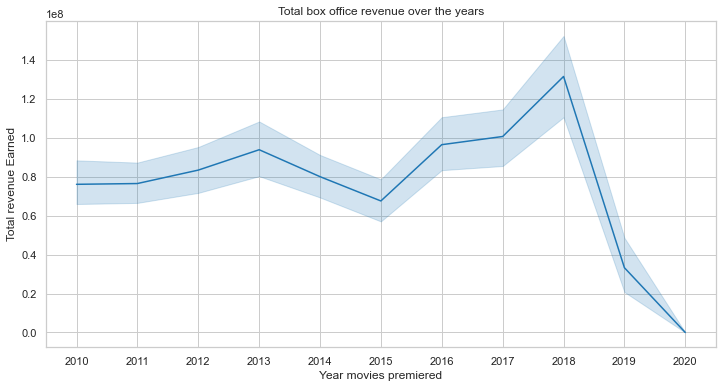

In [58]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig, ax =plt.subplots(figsize=(12,6))
sns.lineplot(data=movie_gross_title_basics , x='start_year', y='total_gross', ax=ax).set(
                    xlabel = "Year movies premiered",
                    ylabel = "Total revenue Earned",
                    title = "Total box office revenue over the years"
);
fig.savefig('images/gross_years')

**_Observations_**:
 <ul type='square'> 
    <li>Movies made a lot of money in 2018. </li>
    <li>There has been a sharp decrease in total gross earned by movies since 2018, with the lowest year being 2020. </br>
        This makes sense since streaming platforms started gaining a lot of hype in 2018, leading to lot of people preferring to stream movies on platforms such as Netflix hence the decline in box office revenues.</li>
 </ul>

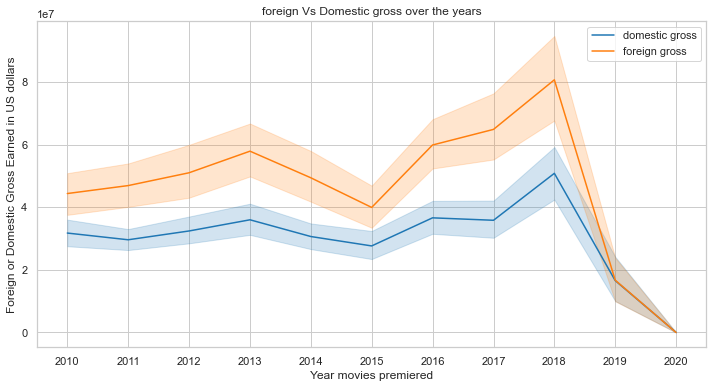

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=movie_gross_title_basics , x='start_year', y='domestic_gross', label='domestic gross' ,ax=ax)
sns.lineplot(data=movie_gross_title_basics , x='start_year', y='foreign_gross',label='foreign gross',ax=ax)
ax.set_xlabel("Year movies premiered")
ax.set_ylabel("Foreign or Domestic Gross Earned in US dollars")
ax.set_title("foreign Vs Domestic gross over the years");
fig.savefig('images/foreign_Vs_Domestic')

**_Observations_**:
 <ul type='square'> 
    <li>Foreign gross was higher than domestic gross in all years except for 2019 to 2020. </li>
    <li>There has been a sharp decrease in both foreign and domestic gross earned by movies since 2018, with the lowest year for both being 2020.</br>
        This makes sense since streaming platforms started gaining a lot of hype in 2018, leading to lot of people preferring to stream movies on platforms such as Netflix hence the decline in box office revenues.</li>
     <li>Movies made zero box office revenue in 2020. </br>
        This is because COVID started in 2020, which lead to the closure of movie theaters in a lot of countries hence there was no box office revenue for movies that year.
     </li>
 </ul>

 ### **2. The preferred movie genres _Vs_ The most profitable movie genres**

In [60]:
# The top 10 most preferred movie genres

top_10_preferred_genres= movie_gross_title_basics['genres'].value_counts()[:10]
top_10_preferred_genres

Drama          1815
Comedy          945
Action          650
Romance         466
Thriller        450
Adventure       444
Crime           379
Documentary     305
Biography       303
Horror          246
Name: genres, dtype: int64

In [61]:
# The top 10 most profitable movie genres

top_10_profitable_genres = movie_gross_title_basics.groupby('genres')['total_gross'].sum()[:10]
top_10_profitable_genres = top_10_profitable_genres.sort_values(ascending=False)
top_10_profitable_genres

genres
Adventure      1.191599e+11
Action         1.071035e+11
Comedy         7.700830e+10
Drama          6.917656e+10
Animation      3.818870e+10
Fantasy        2.632332e+10
Crime          1.816924e+10
Biography      1.401651e+10
Family         1.309904e+10
Documentary    1.007256e+10
Name: total_gross, dtype: float64

In [62]:
# For loop checking for genres in the top_10_preferred_genres that are not in the top_10_profitable_genres

for genre in top_10_preferred_genres.index:
    if genre not in top_10_profitable_genres.index:
        print(genre)

Romance
Thriller
Horror


In [63]:
# For loop checking for genres in the  top_10_profitable_genres that are not in the top_10_preferred_genres

for genre in top_10_profitable_genres.index:
    if genre not in top_10_preferred_genres.index:
        print(genre)

Animation
Fantasy
Family


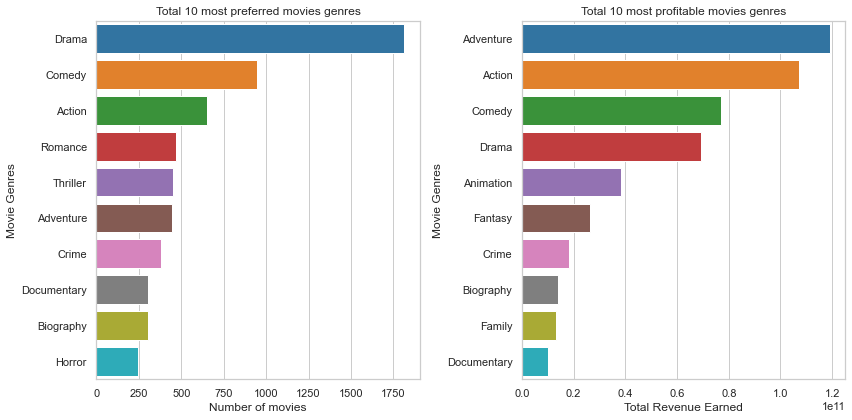

In [64]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
sns.barplot(x=top_10_preferred_genres.values, y=top_10_preferred_genres.index, orient='h', ax=ax1).set(
                    xlabel = "Number of movies",
                    ylabel = "Movie Genres",
                    title = "Total 10 most preferred movies genres"
)
sns.barplot(x=top_10_profitable_genres.values, y=top_10_profitable_genres.index, orient='h', ax=ax2).set(
                    xlabel = "Total Revenue Earned",
                    ylabel = "Movie Genres",
                    title = "Total 10 most profitable movies genres"
);
fig.set_tight_layout(True)
fig.savefig('images/preferred_vs_profitable')

**_Observations_**:
<ul> 
       <li>Drama is the most preferred movie genre. </li>
       <li>Romance, Thriller, Horror which are in the top 10 most preferred movies is not in the top 10 most profitable movies </li>
      <li>Adventure is the most profitable movie genre. </li>
      <li> Animation, Fantasy and Family are in the top 10 most profitable movies but are not in the top 10 most preferred genres</li>
            
 </ul>
     
   

 ### **3. The top 5 highest rated genres**

In [65]:
rating_10 = title_basics_ratings[(title_basics_ratings['averagerating'] >= 8) & (title_basics_ratings['averagerating'] <= 10)]

top_5_highest_rated_genres = rating_10.groupby('genres')['averagerating'].count()
top_5_highest_rated_genres = top_5_highest_rated_genres.sort_values(ascending=False)[:5]
top_5_highest_rated_genres


genres
Documentary    4982
Drama          3140
Comedy         1330
Biography       848
History         595
Name: averagerating, dtype: int64

In [66]:
#For loop checking if the genres in the top_5_highest_rated_genres are also in the top_10_profitable_genres

genres = []
for genre in top_5_highest_rated_genres.index:
    if genre in top_10_profitable_genres.index:
        genres.append(genre)
print(f'Movies that are highly rated and still profitable are: {genres}')

Movies that are highly rated and still profitable are: ['Documentary', 'Drama', 'Comedy', 'Biography']


In [67]:
#For loop checking if the genres in the top_5_highest_rated_genres are also in the top_10_preferred_genres
genres = []
for genre in top_5_highest_rated_genres.index:
    if genre in top_10_preferred_genres.index:
        genres.append(genre)
print(f'Movies that are both highly rated and preferable are: {genres}')

Movies that are both highly rated and preferable are: ['Documentary', 'Drama', 'Comedy', 'Biography']


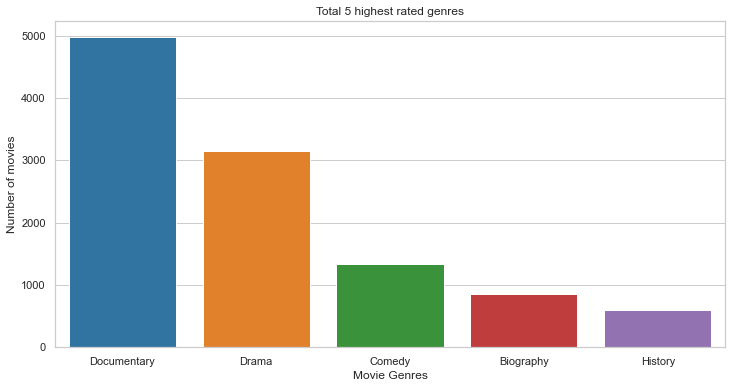

In [68]:
fig,ax =plt.subplots(figsize=(12,6))
sns.barplot(y=top_5_highest_rated_genres.values, x=top_5_highest_rated_genres.index, orient='v', ax=ax).set(
                    xlabel = "Movie Genres",
                    ylabel = "Number of movies",
                    title = "Total 5 highest rated genres"
);
fig.savefig('images/highest_rated_genres')

**_Observations_**:
<ul type='square'> 
       <li>Documentary is the highest rated movie genre. </li>
       <li>The first four genres, that is Documentary, drama , comedy and biography are also in the top ten most preferred/profitable movies </li>
       <li>History is not in the top ten most preferred/profitable movies </li>          
 </ul>

 ### **4. Correlation between Average rating and total gross**

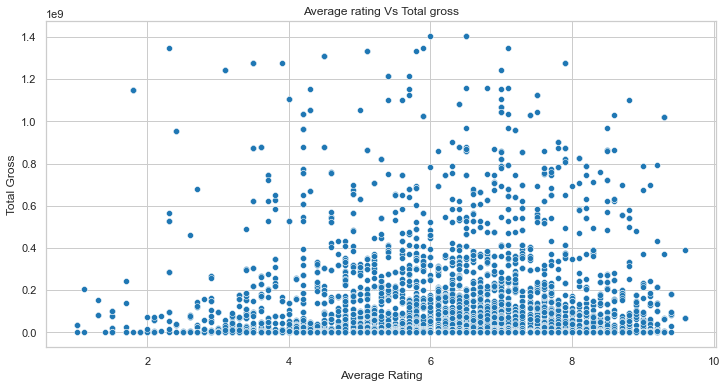

In [69]:
fig,ax =plt.subplots(figsize=(12,6))
sns.scatterplot(x=title_basics_ratings['averagerating'], y=movie_gross_title_basics['total_gross'], ax=ax).set(
                    xlabel = "Average Rating",
                    ylabel = "Total Gross",
                    title = "Average rating Vs Total gross"
);
fig.savefig('images/ rating_gross')

**_Observations_**:
<ul type='square'> 
       <li>There is no correlation between average rating and the total revenue earned </li>
       <li> Majority of movies make a total gross of less than 400 million dollars  </li>
        <li> Majority of movies have an average rating higher than 4  </li     
 </ul>

 ### **5. Top 5 studios based on total revenue earned**

In [70]:
studios = movie_gross_title_basics.groupby('studio')['total_gross'].sum()
top_5_studios = studios.sort_values(ascending=False)[:5]
top_5_studios

studio
BV      1.149262e+11
Fox     8.375431e+10
Uni.    8.190137e+10
WB      7.091928e+10
Sony    5.060107e+10
Name: total_gross, dtype: float64

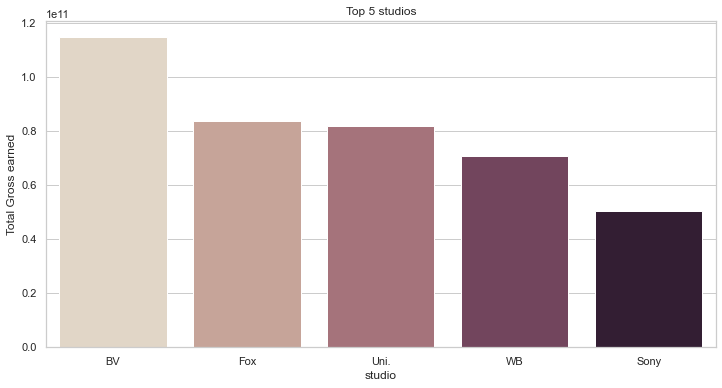

In [71]:
fig,ax =plt.subplots(figsize=(12,6))
sns.barplot(x=top_5_studios.index, y=top_5_studios.values, palette="ch:.25").set(
                    ylabel = "Total Gross earned",
                    title = "Top 5 studios"
);
fig.savefig('images/top_5_studios')

**_Observations_**:
<ul type='square'> 
       <li>BV studio is the highest earning studio </li>
       <li> Fox and Uni.Studio have approximately the same gross earnings</li>
        <li> All 5 studios have a gross total greater than 400 million dollars </li     
 </ul>

## **Conclusion**

* There has been a sharp decrease in box office gross earnings since 2018. This can be attributed to the increase preference for movie streaming in platforms such as Netflix. 
* Adventure, action, comedy and drama are genres that are highly preferred by audiences and also have high profitability. 
* BV Studio has the highest total gross earnings. 

## **Recommendations**
<ol type='i'> 
<li> Create a streaming platform for their movies </li>
<li> Produce movies that have a combination of adventure, action, comedy and drama </li>
<li> Benchmark with top earning movie studios such as BV studios</li>

</ol>